In [0]:
from tensorflow.keras.datasets import reuters

In [2]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
print(train_data[0],end='')

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]

In [5]:
#Decoding newswires back to text
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

In [0]:
def to_one_hot(labels, dimension=46):
 results = np.zeros((len(labels), dimension))
 for i, label in enumerate(labels):
  results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels) 

In [0]:
#Note that there is a built-in way to do this in Keras
from tensorflow.keras.utils import to_categorical
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [0]:
from tensorflow import keras
model=keras.Sequential([
      keras.layers.Dense(64,activation='relu'),
      keras.layers.Dense(64,activation='relu'),
      keras.layers.Dense(46,activation='softmax')                  
])

In [0]:
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])


In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [20]:
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 3.8119 - accuracy: 0.0486 - val_loss: 3.7981 - val_accuracy: 0.2220
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 3.7881 - accuracy: 0.2164 - val_loss: 3.7771 - val_accuracy: 0.2220
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 3.7676 - accuracy: 0.2164 - val_loss: 3.7571 - val_accuracy: 0.2220
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 3.7477 - accuracy: 0.2164 - val_loss: 3.7373 - val_accuracy: 0.2220
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 3.7279 - accuracy: 0.2164 - val_loss: 3.7178 - val_accuracy: 0.2220
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 3.7084 - accuracy: 0.2164 - val_loss: 3.6984 - val_accuracy: 0.2220
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 3.6889 - accuracy: 0.2478 - val_loss: 3.6790 - val_accuracy: 0.2220
Epoch 8/20
16

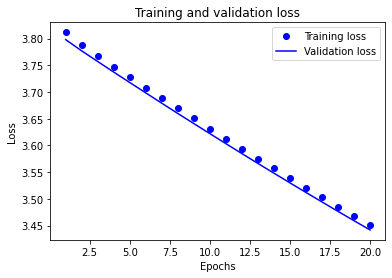

In [23]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

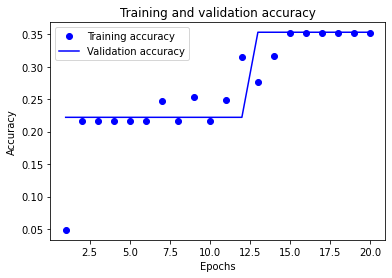

In [24]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [26]:
model = keras.Sequential([
 keras.layers.Dense(64, activation='relu'),
 keras.layers.Dense(64, activation='relu'),
 keras.layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])
model.fit(partial_x_train,
 partial_y_train,
 epochs=9,
 batch_size=512,
 validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 49ms/step - loss: 3.8119 - accuracy: 0.0623 - val_loss: 3.7980 - val_accuracy: 0.0440
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 3.7881 - accuracy: 0.2746 - val_loss: 3.7770 - val_accuracy: 0.2220
Epoch 3/9
16/16 [==============================] - 1s 45ms/step - loss: 3.7677 - accuracy: 0.2521 - val_loss: 3.7571 - val_accuracy: 0.3530
Epoch 4/9
16/16 [==============================] - 1s 45ms/step - loss: 3.7477 - accuracy: 0.3514 - val_loss: 3.7373 - val_accuracy: 0.3530
Epoch 5/9
16/16 [==============================] - 1s 46ms/step - loss: 3.7279 - accuracy: 0.3391 - val_loss: 3.7177 - val_accuracy: 0.3530
Epoch 6/9
16/16 [==============================] - 1s 45ms/step - loss: 3.7084 - accuracy: 0.3514 - val_loss: 3.6983 - val_accuracy: 0.3530
Epoch 7/9
16/16 [==============================] - 1s 45ms/step - loss: 3.6889 - accuracy: 0.3431 - val_loss: 3.6790 - val_accuracy: 0.3530
Epoch 8/9
16/16 [===

In [27]:
 results

[3.6431877613067627, 0.3615316152572632]

Predicting house prices: a regression example

In [28]:
from tensorflow.keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [29]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [0]:
#Normalizing the data
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

In [0]:
def build_model():
  model=keras.Sequential([
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(1)                  
  ])
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

In [37]:
#K-fold validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
 print('processing fold #%d' % i)
 val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
 val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
 partial_train_data = np.concatenate(
 [train_data[:i * num_val_samples],
 train_data[(i + 1) * num_val_samples:]],
 axis=0)
 partial_train_targets = np.concatenate(
 [train_targets[:i * num_val_samples],
 train_targets[(i + 1) * num_val_samples:]],
 axis=0)
 model = build_model()
 model.fit(partial_train_data, partial_train_targets,
 epochs=num_epochs, batch_size=1, verbose=0)
 val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
 all_scores.append(val_mae)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [38]:
 all_scores

[2.027925491333008, 2.2592718601226807, 2.5375185012817383, 2.5265872478485107]

In [39]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
 print('processing fold #%d' % i)
 val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
 val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
 partial_train_data = np.concatenate(
 [train_data[:i * num_val_samples],
 train_data[(i + 1) * num_val_samples:]],
 axis=0)
 partial_train_targets = np.concatenate(
 [train_targets[:i * num_val_samples],
 train_targets[(i + 1) * num_val_samples:]],
 axis=0)
 model = build_model()
 history = model.fit(partial_train_data, partial_train_targets,
 validation_data=(val_data, val_targets),
 epochs=num_epochs, batch_size=1, verbose=0)
 mae_history = history.history['val_mae']
 all_mae_histories.append(mae_history)


processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [0]:
average_mae_history = [
 np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

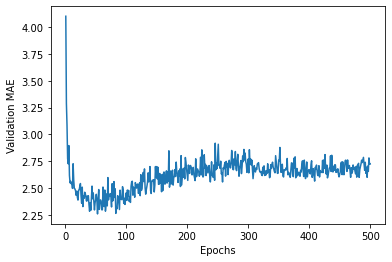

In [41]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


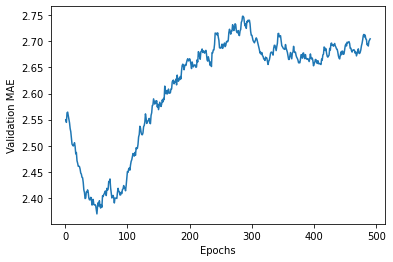

In [44]:
def smooth_curve(points, factor=0.9):
 smoothed_points = []
 for point in points:
  if smoothed_points:
    previous = smoothed_points[-1]
    smoothed_points.append(previous * factor + point * (1 - factor))
  else:
    smoothed_points.append(point)
 return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [45]:
model = build_model()
model.fit(train_data, train_targets,
 epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 20.3962 - mae: 2.9317


In [46]:
 test_mae_score

2.9316601753234863

In [0]:
 predictions = model.predict(test_data)

In [48]:
 predictions[0]

array([7.6060357], dtype=float32)